## importation

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import os
os.chdir('/content/drive/MyDrive/S5-ID/ComputerVision/data/MMU-Iris-Database')

In [5]:
nb_class = 0
for dirname, _, filenames in os.walk('/content/drive/MyDrive/S5-ID/ComputerVision/data/MMU-Iris-Database'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        nb_class += 1

/content/drive/MyDrive/S5-ID/ComputerVision/data/MMU-Iris-Database/ReadMe.txt
/content/drive/MyDrive/S5-ID/ComputerVision/data/MMU-Iris-Database/14/right/liujwr1.bmp
/content/drive/MyDrive/S5-ID/ComputerVision/data/MMU-Iris-Database/14/right/liujwr4.bmp
/content/drive/MyDrive/S5-ID/ComputerVision/data/MMU-Iris-Database/14/right/liujwr3.bmp
/content/drive/MyDrive/S5-ID/ComputerVision/data/MMU-Iris-Database/14/right/liujwr2.bmp
/content/drive/MyDrive/S5-ID/ComputerVision/data/MMU-Iris-Database/14/right/liujwr5.bmp
/content/drive/MyDrive/S5-ID/ComputerVision/data/MMU-Iris-Database/14/left/liujwl1.bmp
/content/drive/MyDrive/S5-ID/ComputerVision/data/MMU-Iris-Database/14/left/liujwl2.bmp
/content/drive/MyDrive/S5-ID/ComputerVision/data/MMU-Iris-Database/14/left/liujwl4.bmp
/content/drive/MyDrive/S5-ID/ComputerVision/data/MMU-Iris-Database/14/left/liujwl3.bmp
/content/drive/MyDrive/S5-ID/ComputerVision/data/MMU-Iris-Database/14/left/liujwl5.bmp
/content/drive/MyDrive/S5-ID/ComputerVision/dat

In [6]:
## nombre de class
nb_class = len(os.listdir("/content/drive/MyDrive/S5-ID/ComputerVision/data/MMU-Iris-Database"))
print("Nombre total de classes:", nb_class)

Nombre total de classes: 46


In [7]:
path = "/content/drive/MyDrive/S5-ID/ComputerVision/data/MMU-Iris-Database"
folder_list = os.listdir(path)

# Filtrer les dossiers qui contiennent les sous-dossiers 'left' et 'right'
iris_folders = [folder for folder in folder_list if os.path.isdir(os.path.join(path, folder, 'left')) and os.path.isdir(os.path.join(path, folder, 'right'))]

iris_class_samples = {}
total_samples_count = 0

for iris_folder in iris_folders:

    left_eye_samples = len([f for f in os.listdir(os.path.join(path, iris_folder, 'left')) if f.endswith('.bmp')])
    right_eye_samples = len([f for f in os.listdir(os.path.join(path, iris_folder, 'right')) if f.endswith('.bmp')])

    total_class_samples = left_eye_samples + right_eye_samples

    iris_class_samples[iris_folder] = total_class_samples

    total_samples_count += total_class_samples
print("Nombre total d'échantillons:", total_samples_count)


Nombre total d'échantillons: 450


In [8]:
import os

# Définir le chemin vers la base de données des iris
path = "/content/drive/MyDrive/S5-ID/ComputerVision/data/MMU-Iris-Database"

# Lister les dossiers dans le répertoire spécifié
folder_list = os.listdir(path)

# Filtrer les dossiers qui contiennent les sous-dossiers 'left' et 'right'
iris_folders = [folder for folder in folder_list if os.path.isdir(os.path.join(path, folder, 'left')) and os.path.isdir(os.path.join(path, folder, 'right'))]

# Initialiser les variables pour stocker les échantillons par classe et le total
iris_class_samples = {}
total_samples_count = 0

# Parcourir les dossiers d'iris et afficher le nombre d'échantillons par classe
for iris_folder in iris_folders:
    # Compter les images dans les dossiers 'left' et 'right'
    left_eye_samples = len([f for f in os.listdir(os.path.join(path, iris_folder, 'left')) if f.endswith('.bmp')])
    right_eye_samples = len([f for f in os.listdir(os.path.join(path, iris_folder, 'right')) if f.endswith('.bmp')])

    # Calculer le nombre total d'échantillons pour cette classe
    total_class_samples = left_eye_samples + right_eye_samples

    # Stocker dans le dictionnaire le nombre d'échantillons par classe
    iris_class_samples[iris_folder] = total_class_samples

    # Ajouter au total global d'échantillons
    total_samples_count += total_class_samples

    # Afficher le nombre d'échantillons pour la classe
    print(f"Classe {iris_folder}: {total_class_samples} échantillons")

# Afficher le nombre total d'échantillons
print("Nombre total d'échantillons:", total_samples_count)


Classe 14: 10 échantillons
Classe 15: 10 échantillons
Classe 18: 10 échantillons
Classe 10: 10 échantillons
Classe 17: 10 échantillons
Classe 1: 10 échantillons
Classe 13: 10 échantillons
Classe 11: 10 échantillons
Classe 16: 10 échantillons
Classe 12: 10 échantillons
Classe 26: 10 échantillons
Classe 20: 10 échantillons
Classe 21: 10 échantillons
Classe 27: 10 échantillons
Classe 22: 10 échantillons
Classe 2: 10 échantillons
Classe 23: 10 échantillons
Classe 19: 10 échantillons
Classe 24: 10 échantillons
Classe 25: 10 échantillons
Classe 28: 10 échantillons
Classe 3: 10 échantillons
Classe 31: 10 échantillons
Classe 34: 10 échantillons
Classe 32: 10 échantillons
Classe 36: 10 échantillons
Classe 35: 10 échantillons
Classe 33: 10 échantillons
Classe 29: 10 échantillons
Classe 30: 10 échantillons
Classe 42: 10 échantillons
Classe 43: 10 échantillons
Classe 40: 10 échantillons
Classe 41: 10 échantillons
Classe 38: 10 échantillons
Classe 44: 10 échantillons
Classe 45: 10 échantillons
Clas


##### La base de données est structurée en **45 classes**, chaque classe correspondant à un individu avec des images de l'œil gauche ('left') et de l'œil droit ('right'). Un filtrage a validé cette organisation, confirmant que chaque classe comprend **10 échantillons**, soit un total de **450 images**. Cette structure équilibrée permet une bonne représentation des motifs de l'iris pour l'entraînement de modèles de classification.

## exemple

In [9]:
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import random

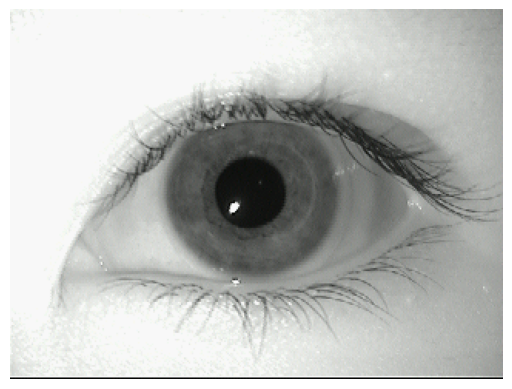

In [10]:
plt.imshow(cv2.cvtColor(cv2.imread('/content/drive/MyDrive/S5-ID/ComputerVision/data/MMU-Iris-Database/1/left/aeval1.bmp'), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


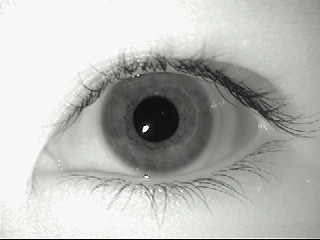

In [11]:
image = cv2.imread("/content/drive/MyDrive/S5-ID/ComputerVision/data/MMU-Iris-Database/1/left/aeval1.bmp")
cv2_imshow(image)

In [12]:
image.shape

(240, 320, 3)

=> Une image RGB (3 channels) de taille 240 x 320

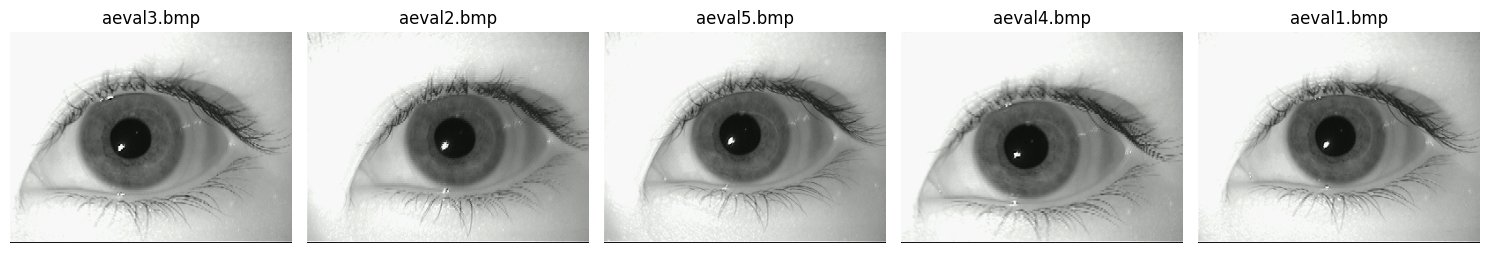

In [13]:
sample_class = "1"

left_eye_samples = os.listdir(os.path.join(path, sample_class, 'left'))
left_eye_samples = [f for f in left_eye_samples if f.endswith('.bmp')][:5]

plt.figure(figsize=(15, 5))

for i, sample_image_name in enumerate(left_eye_samples):
    image_path = os.path.join(path, sample_class, 'left', sample_image_name)

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.subplot(1, 5, i + 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"{sample_image_name}")

plt.tight_layout()
plt.show()

=> Pour la classe 1, les images affichent une bonne qualité.

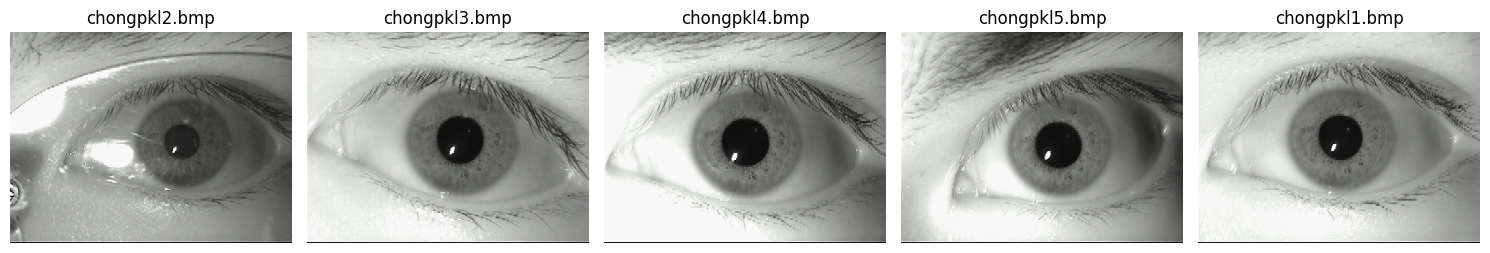

In [14]:
sample_class = "5"

left_eye_samples = os.listdir(os.path.join(path, sample_class, 'left'))
left_eye_samples = [f for f in left_eye_samples if f.endswith('.bmp')][:5]

plt.figure(figsize=(15, 5))

for i, sample_image_name in enumerate(left_eye_samples):
    image_path = os.path.join(path, sample_class, 'left', sample_image_name)

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.subplot(1, 5, i + 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"{sample_image_name}")

plt.tight_layout()
plt.show()

=> Pour la classe 5, certaines images, telles que celle de chongkpl2 avec des lunettes, présentent des problèmes d'éclairage.

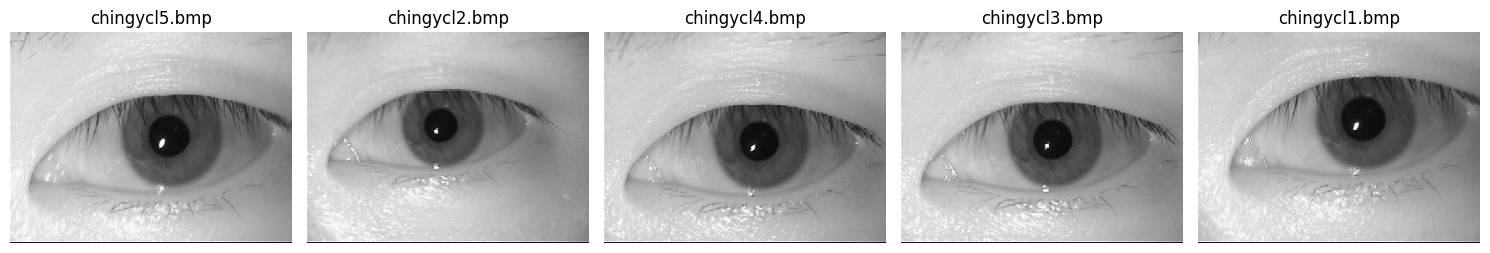

In [15]:
sample_class = "3"

left_eye_samples = os.listdir(os.path.join(path, sample_class, 'left'))
left_eye_samples = [f for f in left_eye_samples if f.endswith('.bmp')][:5]

plt.figure(figsize=(15, 5))

for i, sample_image_name in enumerate(left_eye_samples):
    image_path = os.path.join(path, sample_class, 'left', sample_image_name)

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.subplot(1, 5, i + 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"{sample_image_name}")

plt.tight_layout()
plt.show()

=> Pour la classe 3, certaines images montrent des données incomplètes, les yeux n'étant pas complètement ouverts.

Lors de l'analyse de la base de données, plusieurs problèmes ont été identifiés, affectant la qualité des données :

*    Effets d'éclairage : Certaines images de la classe 5 montrent des problèmes d'éclairage, rendant difficile la distinction des caractéristiques de l'iris.

*    Données incomplètes : Dans la classe 3, plusieurs images présentent des yeux partiellement ouverts, ce qui peut nuire à la précision des modèles.

*    Variabilité de qualité : Alors que la classe 1 contient des images de bonne qualité, d'autres classes souffrent d'une variabilité dans la clarté et la netteté des images.

*    Obstructions : La présence d'objets tels que des lunettes dans certaines images complique la tâche de classification.

# Histogram

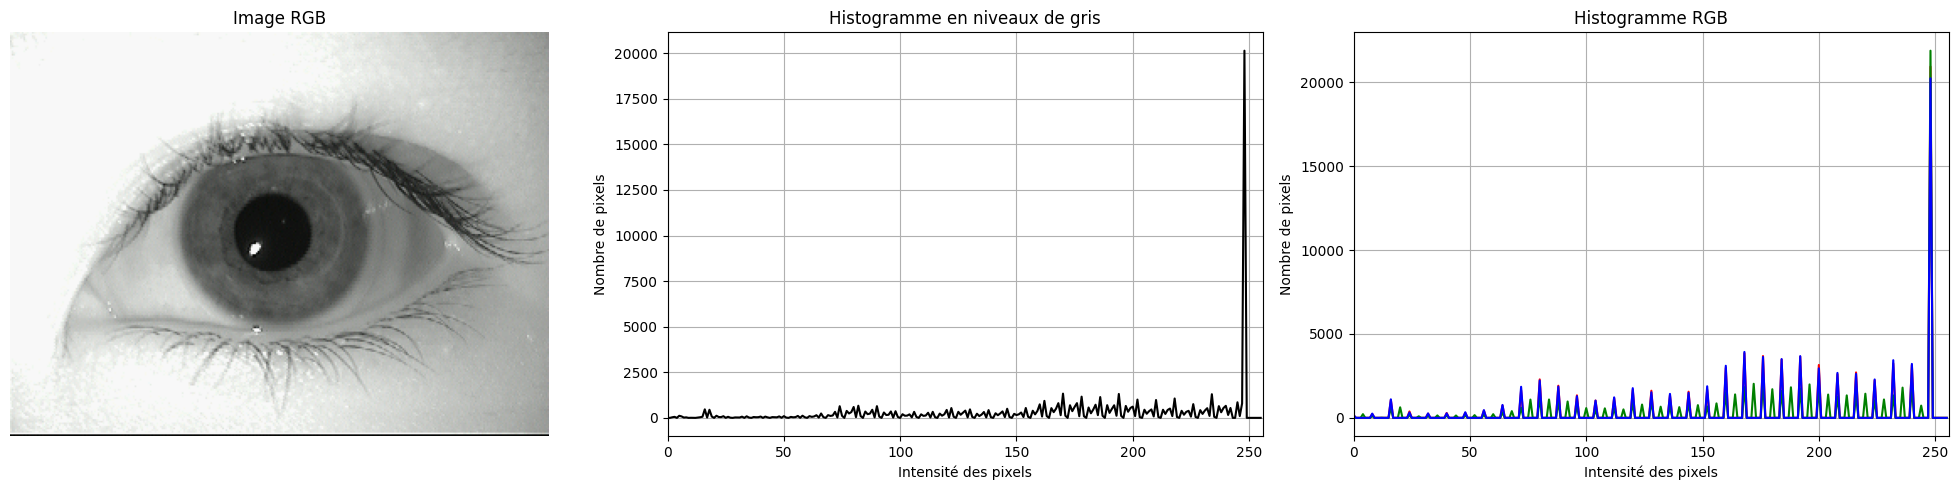

In [16]:
import cv2
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/S5-ID/ComputerVision/data/MMU-Iris-Database/1/left/aeval1.bmp'

# Lire l'image en niveaux de gris
image_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Lire l'image en couleur (RGB)
image_rgb = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB)  # Convertir de BGR à RGB

# Calculer l'histogramme en niveaux de gris
histogram_gray = cv2.calcHist([image_gray], [0], None, [256], [0, 256])

# Calculer les histogrammes pour chaque canal de couleur (Rouge, Vert, Bleu)
colors = ('r', 'g', 'b')
histograms_rgb = {}
for i, color in enumerate(colors):
    histograms_rgb[color] = cv2.calcHist([image_rgb], [i], None, [256], [0, 256])

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Image RGB")


plt.subplot(1, 3, 2)
plt.plot(histogram_gray, color='black')
plt.title("Histogramme en niveaux de gris")
plt.xlabel("Intensité des pixels")
plt.ylabel("Nombre de pixels")
plt.xlim([0, 256])
plt.grid()

plt.subplot(1, 3, 3)
for color in colors:
    plt.plot(histograms_rgb[color], color=color)
plt.title("Histogramme RGB")
plt.xlabel("Intensité des pixels")
plt.ylabel("Nombre de pixels")
plt.xlim([0, 256])
plt.grid()

plt.tight_layout()
plt.show()


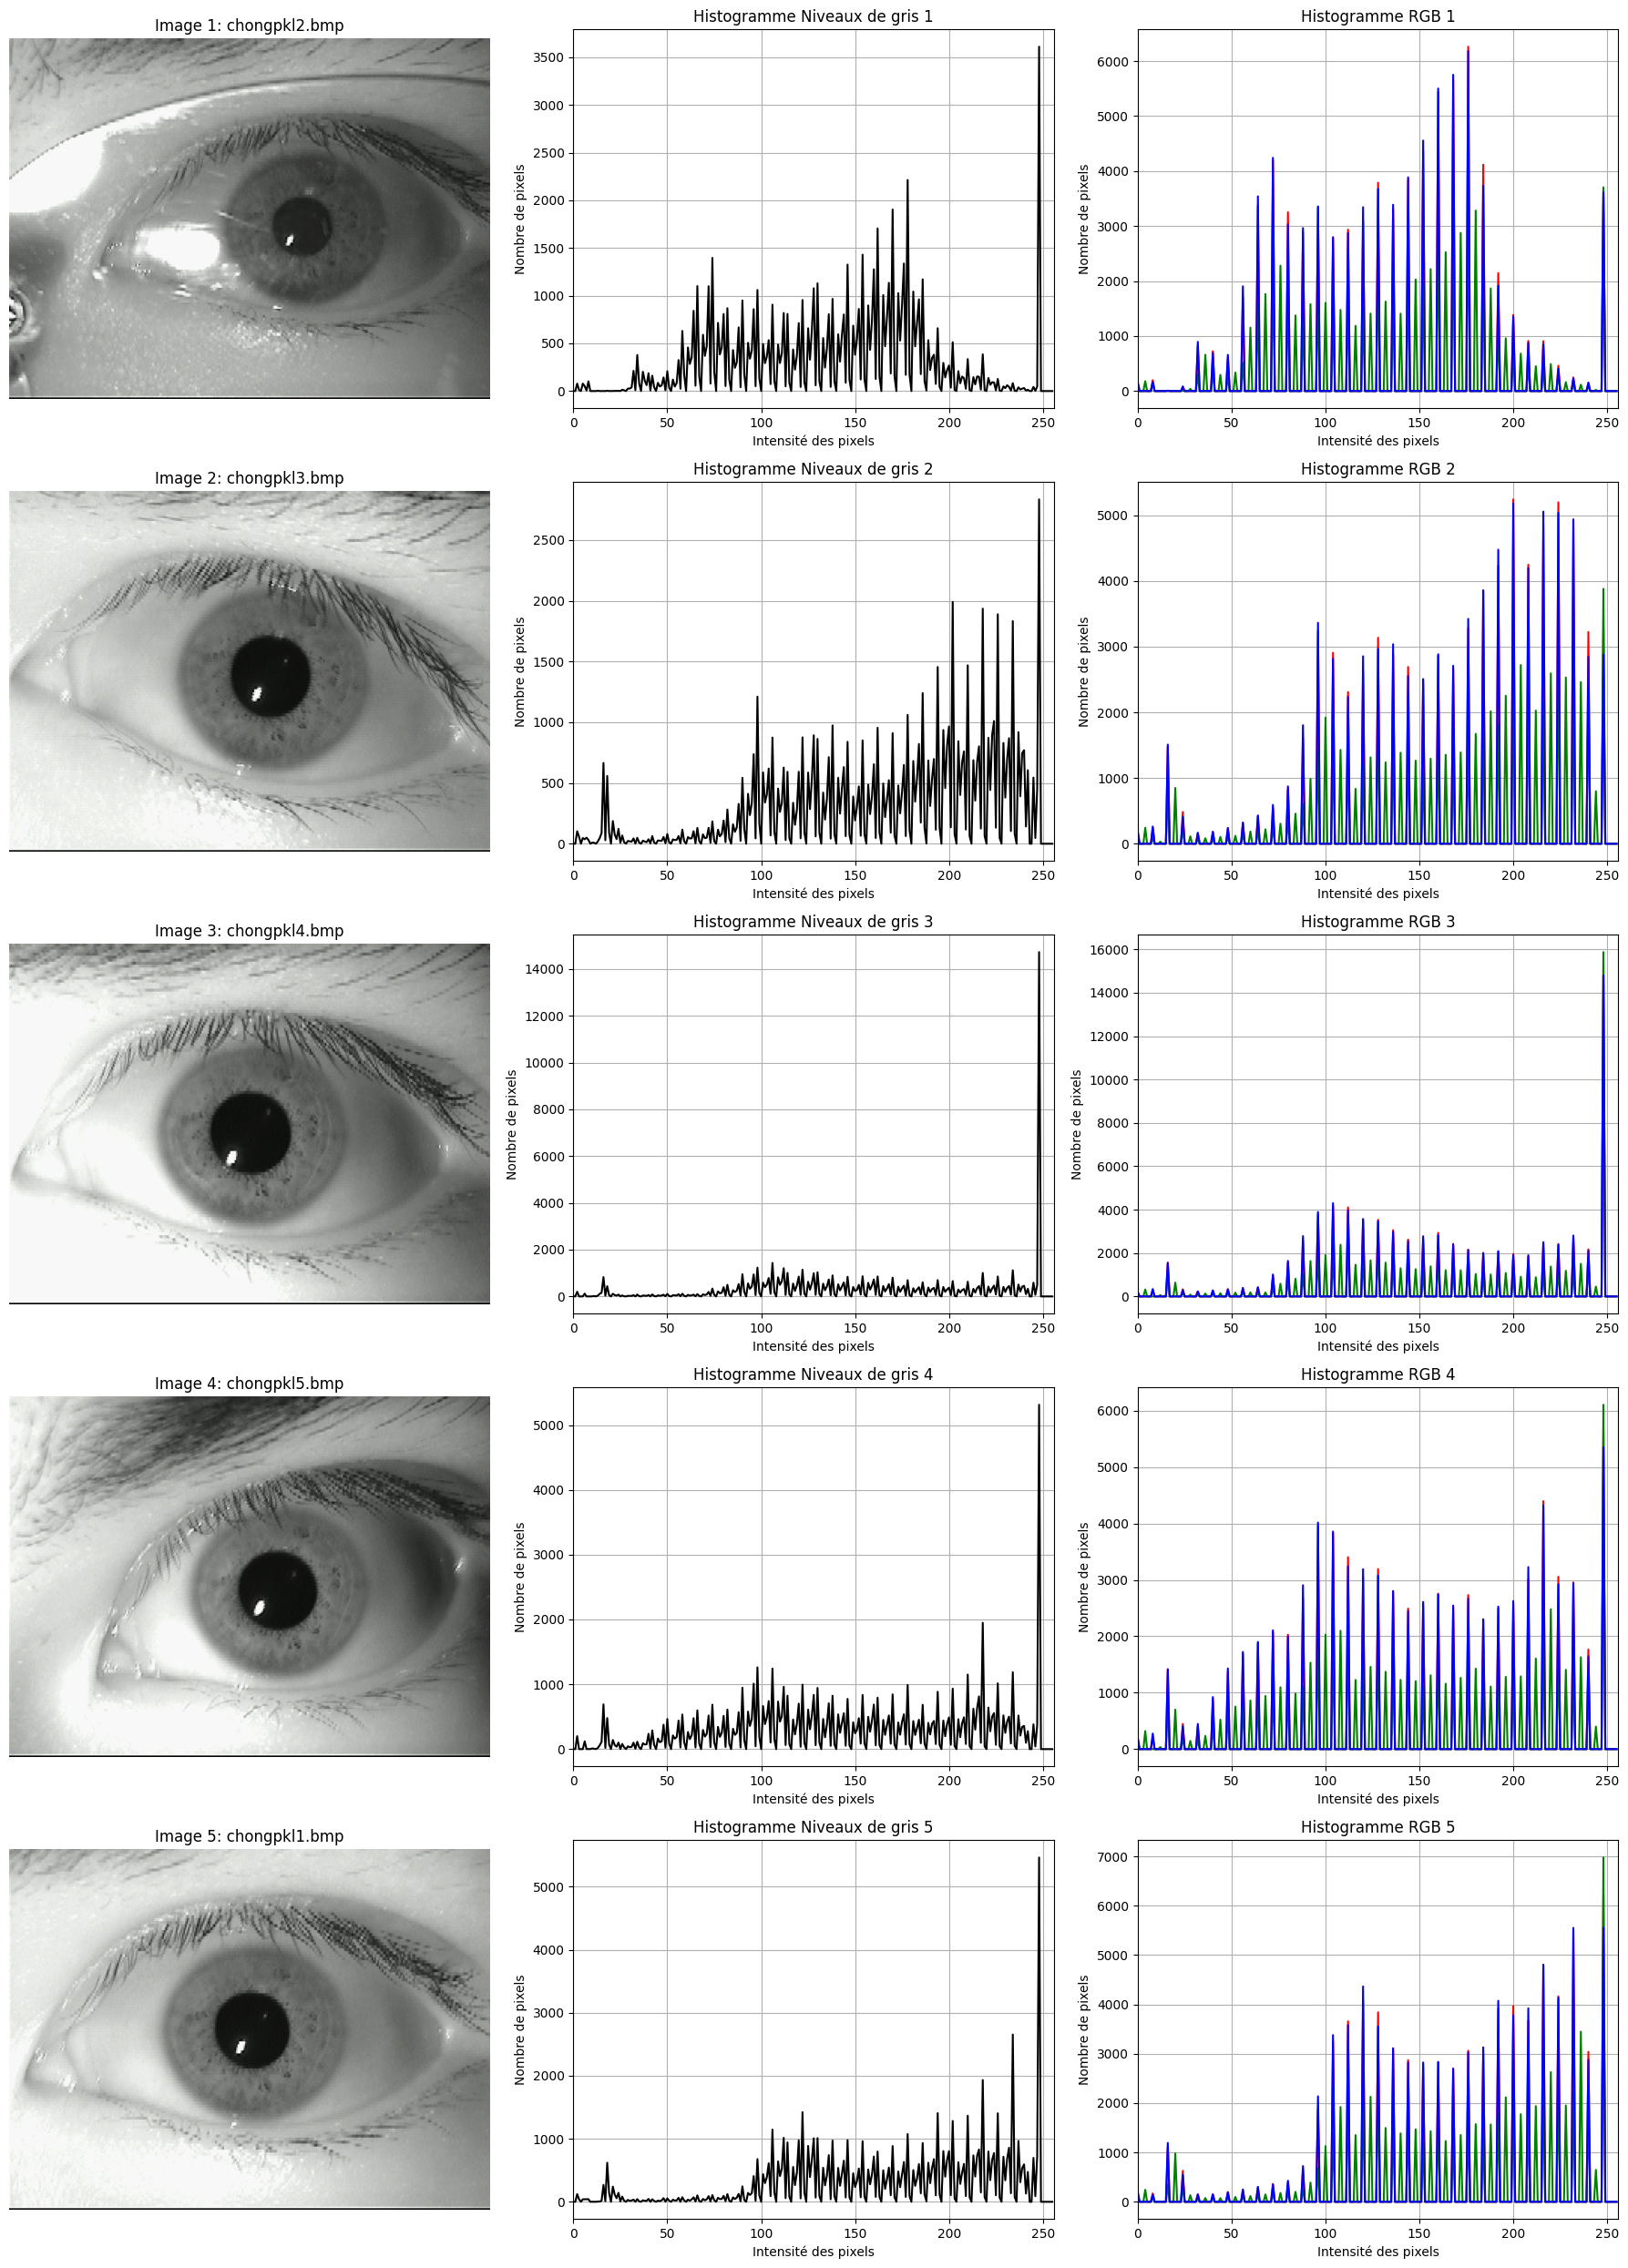

In [17]:
path = '/content/drive/MyDrive/S5-ID/ComputerVision/data/MMU-Iris-Database/5/left'

image_files = [f for f in os.listdir(path) if f.endswith('.bmp')]
num_images_to_display = 5

plt.figure(figsize=(18, num_images_to_display * 5))

for i, image_file in enumerate(image_files[:num_images_to_display]):
    # Lire l'image en niveaux de gris et en RGB
    image_gray = cv2.imread(os.path.join(path, image_file), cv2.IMREAD_GRAYSCALE)
    image_rgb = cv2.imread(os.path.join(path, image_file))
    image_rgb = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB)  # Convertir de BGR à RGB

    # Calculer l'histogramme en niveaux de gris
    histogram_gray = cv2.calcHist([image_gray], [0], None, [256], [0, 256])

    # Calculer les histogrammes pour chaque canal de couleur (Rouge, Vert, Bleu)
    colors = ('r', 'g', 'b')
    histograms_rgb = {}
    for j, color in enumerate(colors):
        histograms_rgb[color] = cv2.calcHist([image_rgb], [j], None, [256], [0, 256])

    plt.subplot(num_images_to_display, 3, 3 * i + 1)  # Ligne i, Colonne 1
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title(f"Image {i+1}: {image_file}")

    plt.subplot(num_images_to_display, 3, 3 * i + 2)  # Ligne i, Colonne 2
    plt.plot(histogram_gray, color='black')
    plt.title(f"Histogramme Niveaux de gris {i+1}")
    plt.xlabel("Intensité des pixels")
    plt.ylabel("Nombre de pixels")
    plt.xlim([0, 256])
    plt.grid()

    plt.subplot(num_images_to_display, 3, 3 * i + 3)  # Ligne i, Colonne 3
    for color in colors:
        plt.plot(histograms_rgb[color], color=color)
    plt.title(f"Histogramme RGB {i+1}")
    plt.xlabel("Intensité des pixels")
    plt.ylabel("Nombre de pixels")
    plt.xlim([0, 256])
    plt.grid()

plt.tight_layout()
plt.show()

*   Reflets et lumières : Dans les histogrammes, certains pics élevés peuvent correspondre à des reflets lumineux sur l'iris (comme visible dans la deuxième image). Cela perturbe la répartition des couleurs et des niveaux de gris.
*   Qualité d'image : La première et la dernière image semblent avoir une meilleure distribution de l'intensité des pixels, ce qui peut indiquer une meilleure qualité d'image.
*   Variabilité : Certaines images montrent une plus grande variabilité dans les histogrammes (comme dans la deuxième), ce qui peut être lié à des perturbations visuelles dans l'image (reflets, objets parasites).

#Division des Données :

In [18]:
import shutil
import random

In [19]:
path = "/content/drive/MyDrive/S5-ID/ComputerVision/data/MMU-Iris-Database"
train_dir = "/content/drive/MyDrive/S5-ID/ComputerVision/data/train"
test_dir = "/content/drive/MyDrive/S5-ID/ComputerVision/data/test"

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

classes = os.listdir(path)

for cls in classes:
    for sub_class in ['left', 'right']:
        sub_class_path = os.path.join(path, cls, sub_class)
        if os.path.isdir(sub_class_path):
            images = [f for f in os.listdir(sub_class_path) if f.endswith('.bmp')]

            random.shuffle(images)

            train_images = images[:3]
            test_images = images[3:5]

            train_class_dir = os.path.join(train_dir, cls, sub_class)
            test_class_dir = os.path.join(test_dir, cls, sub_class)
            os.makedirs(train_class_dir, exist_ok=True)
            os.makedirs(test_class_dir, exist_ok=True)

            for img in train_images:
                shutil.copy(os.path.join(sub_class_path, img), os.path.join(train_class_dir, img))

            for img in test_images:
                shutil.copy(os.path.join(sub_class_path, img), os.path.join(test_class_dir, img))

on a divisé la base de données en ensembles d'entraînement et de test :     
*   train : contient 3 images par sous-classe (left et right).
*   test : contient 2 images par sous-classe (left et right).




In [20]:
def charger_images_labels(directory):
    X = []  # Vecteur pour les images
    y = []  # Vecteur pour les labels (classe associée à chaque image)

    for cls in os.listdir(directory):
        class_dir = os.path.join(directory, cls)

        for sub_class in ['left', 'right']:
            sub_class_dir = os.path.join(class_dir, sub_class)
            if os.path.isdir(sub_class_dir):

                for img_name in os.listdir(sub_class_dir):
                    if img_name.endswith('.bmp'):
                        img_path = os.path.join(sub_class_dir, img_name)
                        image = cv2.imread(img_path)

                        if image is not None:
                            X.append(image)
                            y.append(cls)

    # Convertir les listes en tableaux NumPy
    X = np.array(X)
    y = np.array(y)

    return X, y

X_train, y_train = charger_images_labels(train_dir)
X_test, y_test = charger_images_labels(test_dir)

# Afficher la forme des tableaux chargés
print(f"Train images shape: {X_train.shape}")
print(f"Train labels shape: {y_train.shape}")
print(f"Test images shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")


Train images shape: (270, 240, 320, 3)
Train labels shape: (270,)
Test images shape: (180, 240, 320, 3)
Test labels shape: (180,)


# 2 - Prepocessing

In [22]:
X_train[0].shape

(240, 320, 3)

=> l'image est en RGB (3 channels)

In [23]:
# les transformer en niveau de gris
X_train = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in X_train]

In [24]:
X_train[0].shape

(240, 320)

=> image en niveau de gris

## Binarisation

In [25]:
threshold = 128
X_train_bin = [cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)[1] for img in X_train]

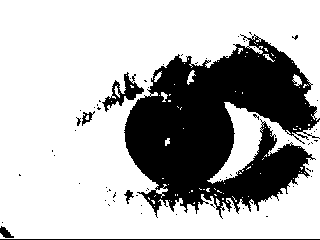

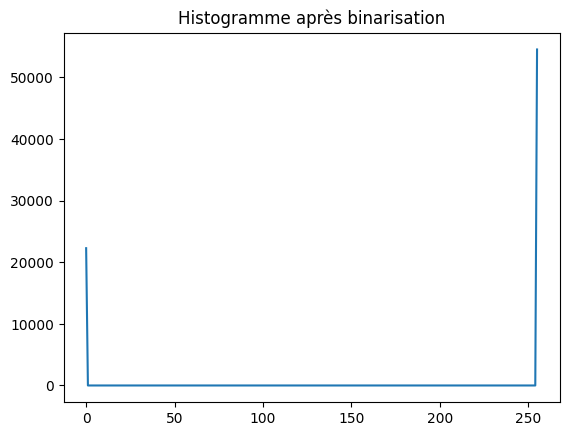

In [28]:
cv2_imshow(X_train_bin[0])
histogram = cv2.calcHist([X_train_bin[0]], [0], None, [256], [0, 256])
plt.plot(histogram)
plt.title('Histogramme après binarisation')
plt.show()

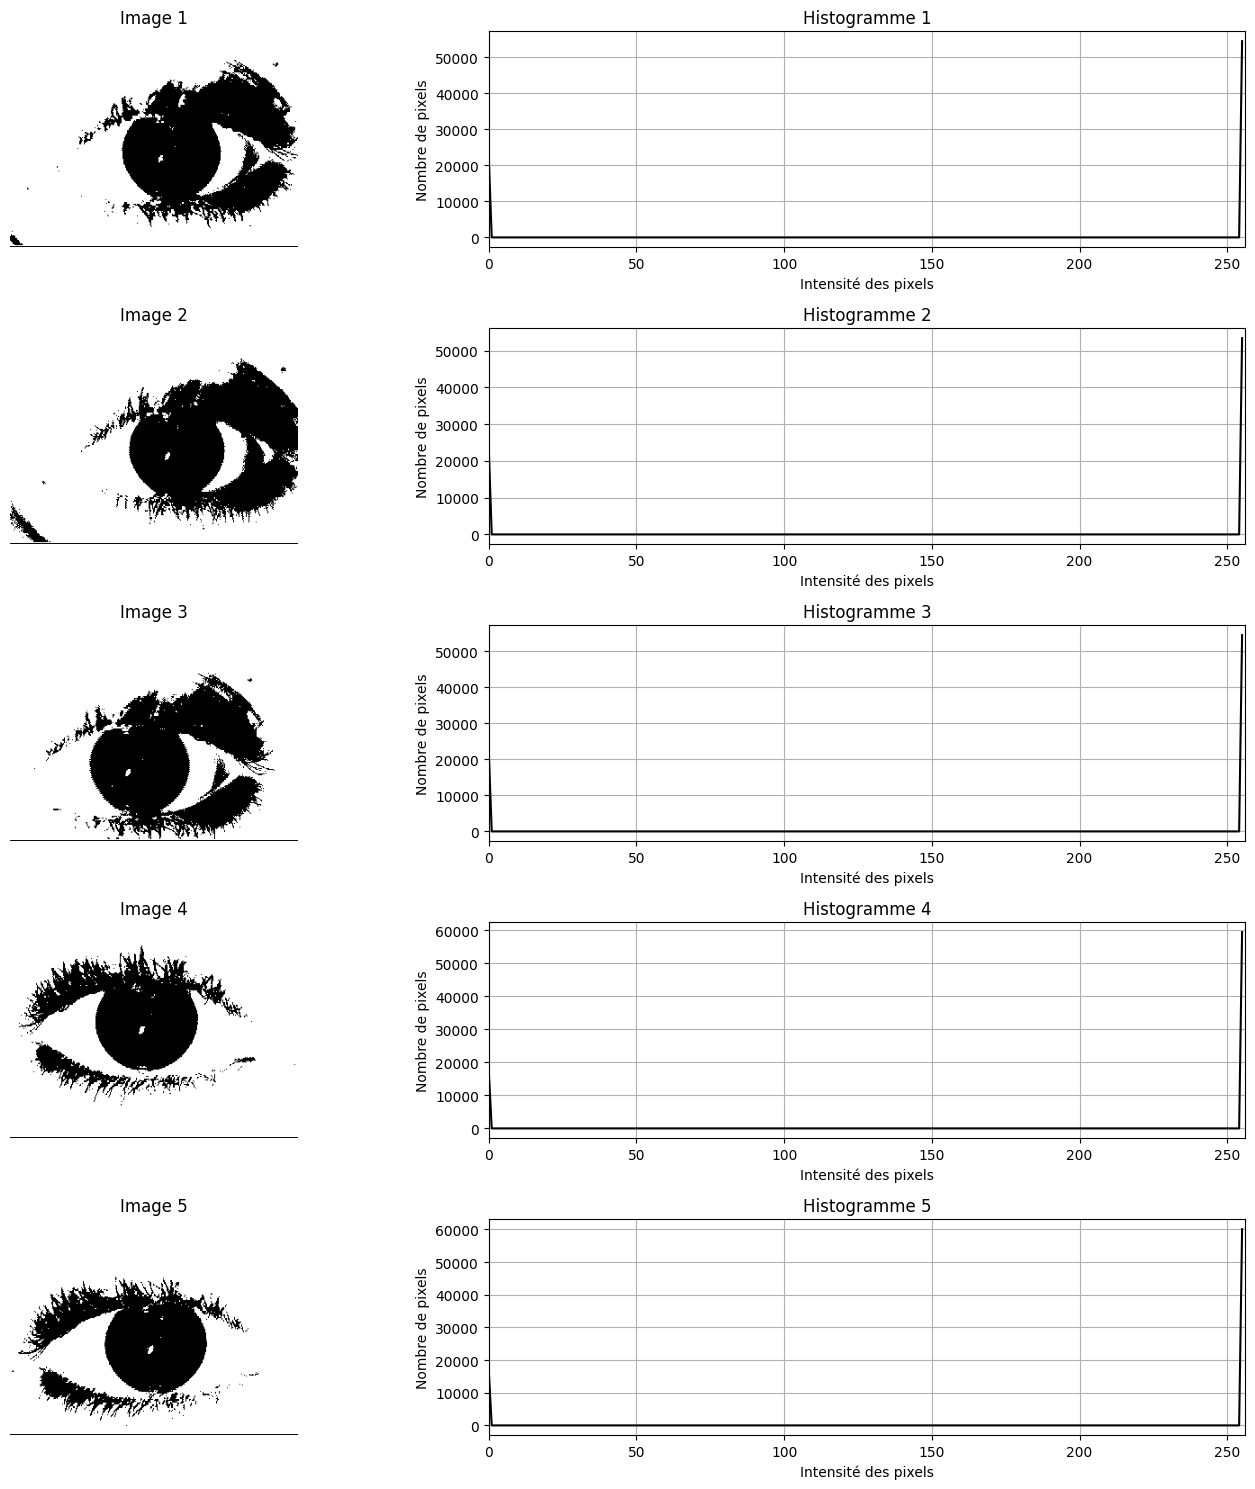

In [31]:
def afficher_images_histogrammes(X, num_images=5):
    plt.figure(figsize=(15, num_images * 3))

    for i in range(num_images):
        image = X[i]

        histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

        plt.subplot(num_images, 2, 2 * i + 1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.title(f"Image {i+1}")

        plt.subplot(num_images, 2, 2 * i + 2)
        plt.plot(histogram, color='black')
        plt.title(f"Histogramme {i+1}")
        plt.xlabel("Intensité des pixels")
        plt.ylabel("Nombre de pixels")
        plt.xlim([0, 256])
        plt.grid()

    plt.tight_layout()
    plt.show()

afficher_images_histogrammes(X_train_bin, num_images=5)

Après la binarisation de l'image en noir et blanc, nous transformons les pixels en deux valeurs : noir (0) et blanc (255). Cette technique simplifie l'image en éliminant les niveaux de gris, ne conservant que les formes les plus importantes.
*   Simplicité : L'image est plus facile à traiter pour des tâches telles que la détection de contours, la segmentation ou la reconnaissance de formes.
*   Réduction de bruit : Les variations légères de luminosité sont supprimées, ce qui peut aider à réduire le bruit et rendre les contours des objets plus nets.
*   Facilité d'analyse : L'image binaire peut simplifier certaines analyses statistiques ou géométriques, par exemple pour mesurer la taille des objets ou détecter des formes.

## Data augmentation

In [35]:
def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    # le centre de l'image
    center = (w // 2, h // 2)
    # la matrice de rotation
    M = cv2.getRotationMatrix2D(center, angle, 1.0)

    # Appliquer la rotation
    rotated_image = cv2.warpAffine(image, M, (w, h))

    return rotated_image


In [36]:
def flip_image(image):
    # Appliquer un retournement horizontal
    flipped_image = cv2.flip(image, 1)

    return flipped_image

In [37]:
def zoom_image(image, zoom_factor):

    (h, w) = image.shape[:2]

    # Calculer les nouvelles dimensions
    new_w = int(w * zoom_factor)
    new_h = int(h * zoom_factor)

    # Redimensionner l'image
    zoomed_image = cv2.resize(image, (new_w, new_h))

    # Si l'image zoomée est plus grande que l'originale, couper au centre
    if zoom_factor > 1.0:
        crop_w = (new_w - w) // 2
        crop_h = (new_h - h) // 2
        zoomed_image = zoomed_image[crop_h:crop_h+h, crop_w:crop_w+w]

    # Si l'image zoomée est plus petite, on la centre
    elif zoom_factor < 1.0:
        pad_w = (w - new_w) // 2
        pad_h = (h - new_h) // 2
        zoomed_image = cv2.copyMakeBorder(zoomed_image, pad_h, pad_h, pad_w, pad_w, cv2.BORDER_CONSTANT, value=0)

    return zoomed_image

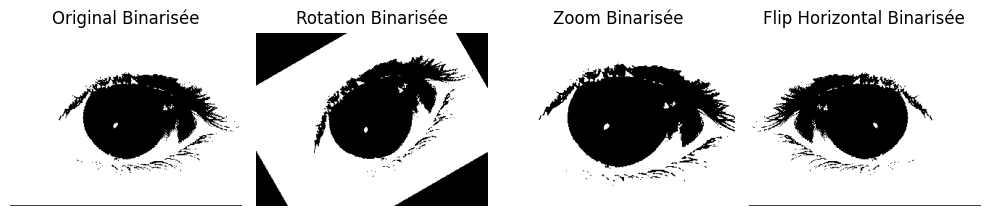

In [43]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Charger une image exemple (ton image doit être binarisée en niveaux de gris)
image = cv2.imread('/content/drive/MyDrive/S5-ID/ComputerVision/data/MMU-Iris-Database/1/left/aeval1.bmp', cv2.IMREAD_GRAYSCALE)

# Appliquer des augmentations
rotated = rotate_image(image, 30)
zoomed = zoom_image(image, 1.2)
flipped = flip_image(image)

# Binariser les images avec un seuil de 128
_, image_bin = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
_, rotated_bin = cv2.threshold(rotated, 128, 255, cv2.THRESH_BINARY)
_, zoomed_bin = cv2.threshold(zoomed, 128, 255, cv2.THRESH_BINARY)
_, flipped_bin = cv2.threshold(flipped, 128, 255, cv2.THRESH_BINARY)

# Afficher les résultats
plt.figure(figsize=(10, 10))

plt.subplot(1, 4, 1)
plt.imshow(image_bin, cmap='gray')
plt.title('Original Binarisée')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(rotated_bin, cmap='gray')
plt.title('Rotation Binarisée')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(zoomed_bin, cmap='gray')
plt.title('Zoom Binarisée')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(flipped_bin, cmap='gray')
plt.title('Flip Horizontal Binarisée')
plt.axis('off')

plt.tight_layout()
plt.show()

In [46]:
import random

def augment_data(images, labels):
    augmented_images = []
    augmented_labels = []

    for img, label in zip(images, labels):
        augmentation_applied = False  # Pour vérifier si une augmentation a été appliquée

        # Rotation aléatoire
        if random.choice([True, False]):
            angle = random.uniform(-30, 30)  # entre -30 et 30°
            rotated_image = rotate_image(img, angle)
            augmented_images.append(rotated_image)
            augmented_labels.append(label)
            augmentation_applied = True

        # Flip horizontal aléatoire
        if random.choice([True, False]):
            flipped_image = flip_image(img)
            augmented_images.append(flipped_image)
            augmented_labels.append(label)
            augmentation_applied = True

        # Zoom aléatoire
        if random.choice([True, False]):
            zoom_factor = random.uniform(1.1, 1.5)  # Zoom entre 1.1x et 1.5x
            zoomed_image = zoom_image(img, zoom_factor)
            augmented_images.append(zoomed_image)
            augmented_labels.append(label)
            augmentation_applied = True

        # Si aucune augmentation n'a été appliquée, on ajoute l'image d'origine
        if not augmentation_applied:
            augmented_images.append(img)
            augmented_labels.append(label)

    return augmented_images, augmented_labels

# Utiliser la fonction pour augmenter les données d'entraînement
train_augmented, labels_augmented = augment_data(X_train, y_train)

print("Nombre d'images avant augmentation : ", len(X_train))
print("Nombre d'images après augmentation : ", len(train_augmented))


Nombre d'images avant augmentation :  270
Nombre d'images après augmentation :  440


In [47]:
import os

# Définir le chemin de sauvegarde pour les images augmentées
save_path = '/content/drive/MyDrive/S5-ID/ComputerVision/data/MMU-Iris-Database/AugmentedImages'

# Créer le répertoire s'il n'existe pas
os.makedirs(save_path, exist_ok=True)

# Fonction pour sauvegarder les images originales
def save_original_images(images, labels):
    for i, (img, label) in enumerate(zip(images, labels)):
        filename = f"original_label_{label}_image_{i}.bmp"  # Nom de fichier pour image originale
        cv2.imwrite(os.path.join(save_path, filename), img)

# Fonction pour sauvegarder les images augmentées
def save_augmented_images(augmented_images, labels, prefix='aug_'):
    for i, (img, label) in enumerate(zip(augmented_images, labels)):
        filename = f"{prefix}label_{label}_image_{i}.bmp"  # Nom de fichier pour image augmentée
        cv2.imwrite(os.path.join(save_path, filename), img)

# Sauvegarder les images originales
save_original_images(X_train, y_train)

# Sauvegarder les images augmentées
save_augmented_images(train_augmented, labels_augmented)

print(f"Images originales et augmentées sauvegardées dans {save_path}")


Images originales et augmentées sauvegardées dans /content/drive/MyDrive/S5-ID/ComputerVision/data/MMU-Iris-Database/AugmentedImages


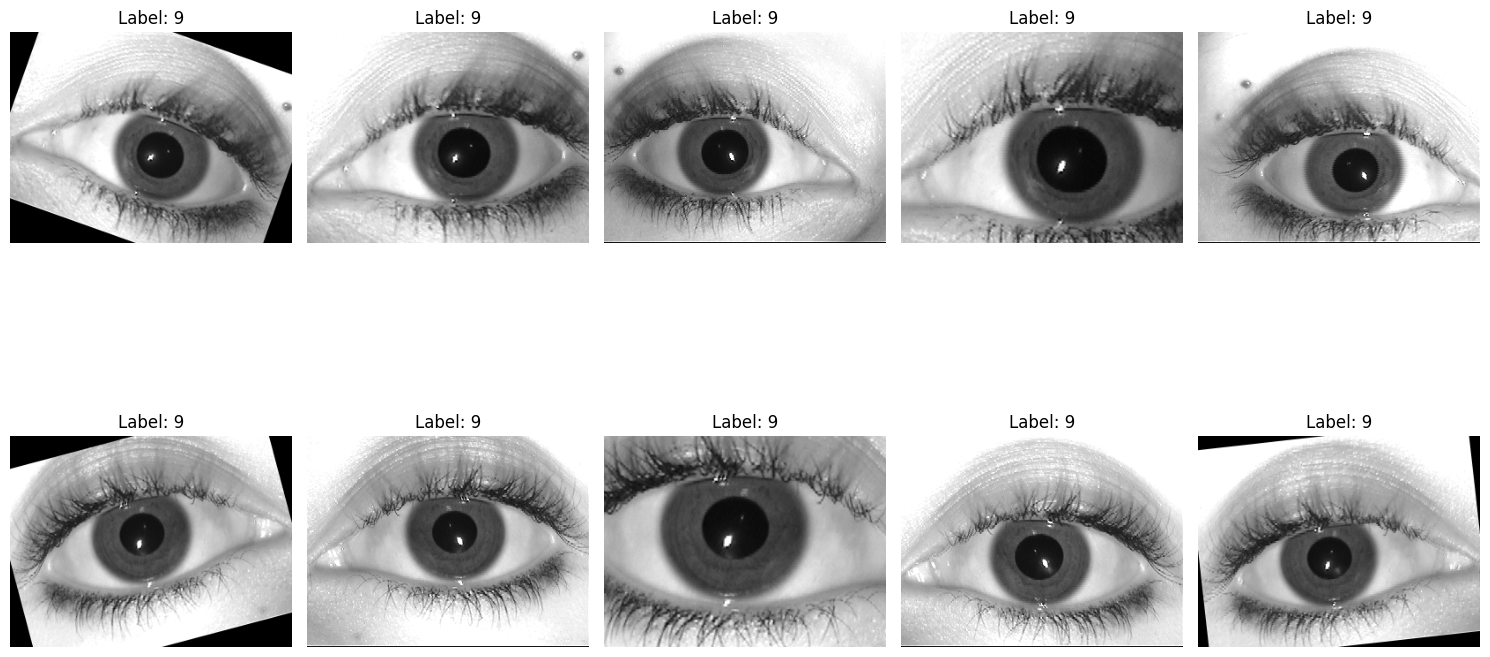

In [48]:
num_images_to_display = 10

# S'assurer que nous avons au moins 10 images augmentées
if len(train_augmented) >= num_images_to_display:
    images_to_display = train_augmented[:num_images_to_display]
    labels_to_display = labels_augmented[:num_images_to_display]
else:
    images_to_display = train_augmented
    labels_to_display = labels_augmented

# Créer une figure pour afficher les images
plt.figure(figsize=(15, 10))

for i in range(len(images_to_display)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images_to_display[i], cmap='gray')
    plt.axis('off')
    plt.title(f"Label: {labels_to_display[i]}")

plt.tight_layout()
plt.show()

In [49]:
def binarize_images(input_dir, output_dir):

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for filename in os.listdir(input_dir):
        if filename.endswith('.bmp') or filename.endswith('.png'):
            image_path = os.path.join(input_dir, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

            # Enregistrer l'image binarisée
            output_path = os.path.join(output_dir, filename.replace('.bmp', '_binarized.bmp'))
            cv2.imwrite(output_path, binary_image)

# Définir les chemins d'entrée et de sortie
input_directory = '/content/drive/MyDrive/S5-ID/ComputerVision/data/MMU-Iris-Database/AugmentedImages'  # Répertoire source
output_directory = '/content/drive/MyDrive/S5-ID/ComputerVision/data/MMU-Iris-Database/Binarized'  # Répertoire de destination

# Appliquer la binarisation
binarize_images(input_directory, output_directory)

print("Binarisation terminée. Les images binarisées sont enregistrées dans :", output_directory)


Binarisation terminée. Les images binarisées sont enregistrées dans : /content/drive/MyDrive/S5-ID/ComputerVision/data/MMU-Iris-Database/Binarized


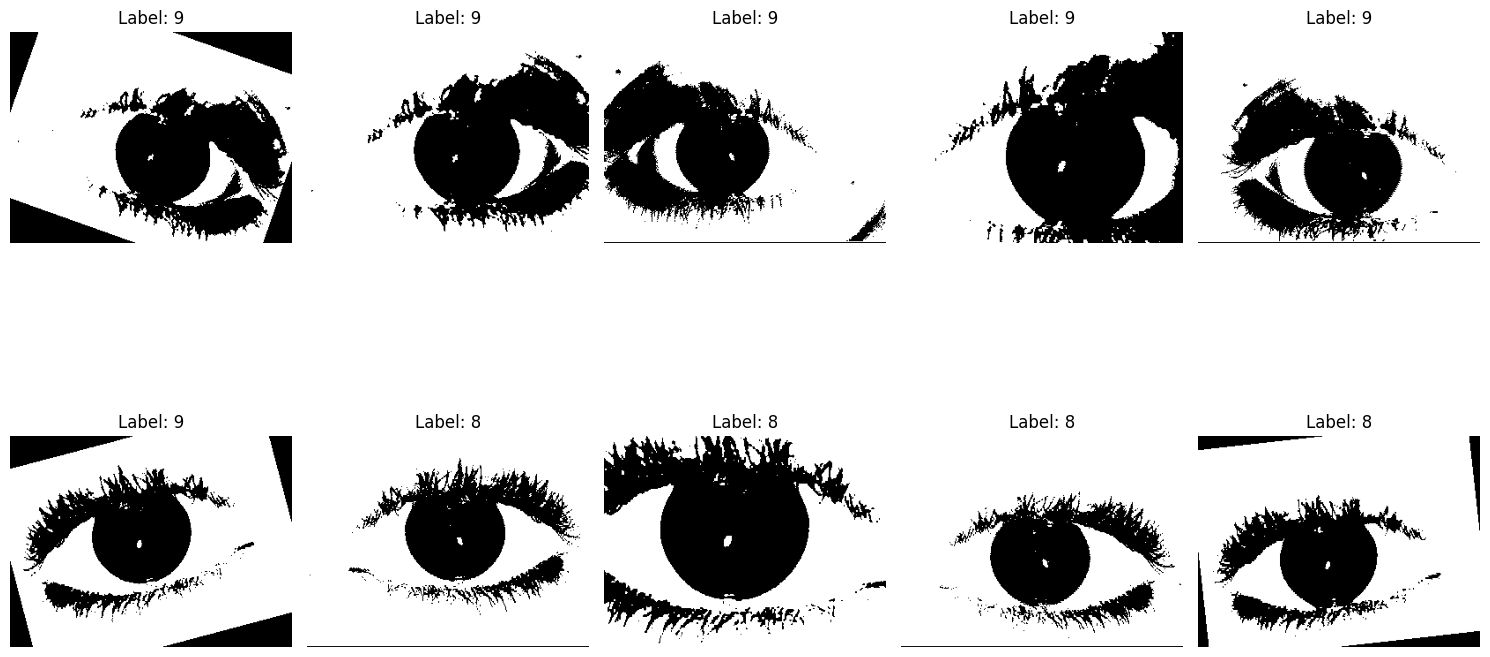

In [51]:
plt.figure(figsize=(15, 10))

# Limiter à 10 images si plus de 10 sont fournies
num_images = min(10, len(train_augmented))

for i in range(num_images):
    # Binariser l'image
    _, binary_image = cv2.threshold(train_augmented[i], 128, 255, cv2.THRESH_BINARY)

    # Afficher l'image binarisée
    plt.subplot(2, 5, i + 1)  # 2 lignes, 5 colonnes
    plt.imshow(binary_image, cmap='gray')
    plt.axis('off')
    plt.title(f"Label: {y_train[i]}")  # Afficher le label correspondant

plt.tight_layout()
plt.show()